We used this notebook to try out the regression model. We tried different things, such as a linear regression, logistic regression and also different steps for the graduation rate/ put the school in discrete classes. All models were evaluate with the sklearn intern score, where 1 is the best possible score. Nothing reached a good enough score (between -0.01 - 0.04).

After this we decided to change to a classification model, for more information see the notebook classification.

In [ ]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [215]:
#get a custom round function
def custom_round(x, base=0.05):
    return base*round(x/base)

#put the schools in one of 4 categories depending on the graduation rate
def get_qualSchool(df, col="qual_school"):
    maxGrad=data.groupby("qual_school").max().reset_index()
    maxGrad=maxGrad[["qual_school","avg_grad_round"]]
    max0=maxGrad["avg_grad_round"][0]
    max1=maxGrad["avg_grad_round"][1]
    max2=maxGrad["avg_grad_round"][2]
    max3=maxGrad["avg_grad_round"][3]
    df.loc[df["avg_grad_round"]<=max0,"qual_school"]=0
    df.loc[((df["avg_grad_round"]>max0) &(df["avg_grad_round"]<=max1)) ,"qual_school"]=1
    df.loc[((df["avg_grad_round"]>max1) &(df["avg_grad_round"]<=max2)) ,"qual_school"]=2
    df.loc[((df["avg_grad_round"]>max2) &(df["avg_grad_round"]<=max3)) ,"qual_school"]=3
    df.loc[df["avg_grad_round"]>max3,"qual_school"]=4
    return df
    

In [233]:
#prepare the dataset for the analysis
dataPrep=pd.read_csv("datasets/dataForML.csv")
data=pd.read_csv("datasets/dataForMLScatter.csv")

dataPrep["total_grads_of_cohort"]=dataPrep["total_grads_of_cohort"]/100
df_mean=dataPrep.groupby("dbn").mean()
df_mean=df_mean.reset_index()
df_mean["avg_grad_round"]=df_mean["total_grads_of_cohort"].apply(lambda x: custom_round(x))
df_mean=df_mean[["dbn","avg_grad_round"]]

stdGrad=dataPrep.groupby("dbn").std()
stdGrad=stdGrad.reset_index()
stdGrad=stdGrad[["dbn","total_grads_of_cohort"]]
stdGrad=stdGrad.rename(columns={"total_grads_of_cohort":"std_Grads"})
stdGrad["std_Grads_round"]=stdGrad["std_Grads"].apply(lambda x: custom_round(x))
data=data.merge(stdGrad, on="dbn",how="left")
data=data.merge(df_mean, on="dbn",how="left")
data=data.dropna(subset=["trees","crashes","pc","shootings","arrests","programs","bins","avg_perc Grads","std_Grads"])
data=data.sort_values(by=["avg_grad_round"])
data=data.reset_index()
data["qual_school"]=0
class_width=data.shape[0]//5
class_width
data.loc[class_width:2*class_width,"qual_school"]=1
data.loc[class_width*2:3*class_width,"qual_school"]=2
data.loc[class_width*3:4*class_width,"qual_school"]=3
data.loc[class_width*4:,"qual_school"]=4


In [234]:
#create test & train set

X=data[["trees","crashes","pc","shootings","arrests","programs","bins"]]

y_=data[["avg_grad_round","std_Grads_round"]]
y=data[ "qual_school"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, stratify=y, random_state=42)

y_train=pd.DataFrame(y_train)
y_train=y_train.join(y_)
y_train=y_train.drop(columns=["qual_school"])

y_test=pd.DataFrame(y_test)
y_test=y_test.join(y_)
y_test=y_test.drop(columns=["qual_school"])


In [235]:
#fit the regression model
reg=LinearRegression().fit(X_train,y_train)

In [236]:
#get the predicition of the test set
y_hat = reg.predict(X_test)

In [240]:
#transform the labels of the train set into discrete classes
dfy_hat=pd.DataFrame(y_hat,columns=["avg_grad_round","std_Grad_round"])
dfy_hat["qual_school"]=0
dfy_hat=get_qualSchool(df_yhat)
dfy_hat
y_test_=y_test
y_test_["qual_school"]=0
y_test_=get_qualSchool(y_test_)
y_test_=y_test_.reset_index()
df_res=dfy_hat-y_test_



<AxesSubplot:ylabel='Frequency'>

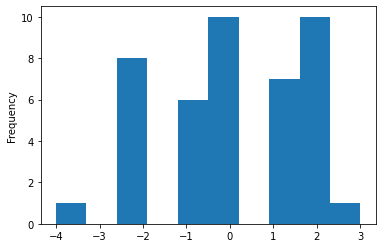

In [242]:
#see the frequency
df_res["qual_school"].plot.hist()

In [196]:
reg.score(X_test,y_test)

0.08720800031411174

In [197]:
y_avg_hat=[x[0] for x in y_hat]
y_avg_test=y_test["avg_grad_round"].to_list()
#y_avg_hat=[custom_round(x) for x in y_avg_hat]

In [198]:
y_std_hat=[x[0] for x in y_hat]
y_std_test=y_test["std_Grads_round"].to_list()
#y_std_hat=[custom_round(x) for x in y_std_hat]

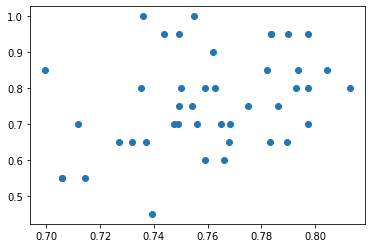

In [199]:
import matplotlib.pyplot as plt
plt.scatter(y_avg_hat, y_avg_test)

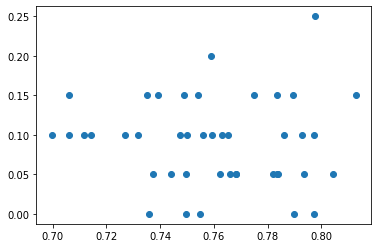

In [200]:
import matplotlib.pyplot as plt
plt.scatter(y_std_hat, y_std_test)

In [128]:
y_hat.shape

(43, 2)

In [75]:
reg.coef_

array([[-0.18542258,  0.50102911,  0.97925036, -2.98479894,  1.11940541,
        -2.03651117, -0.82375095],
       [ 0.19762734,  0.53370411, -0.46284065,  1.68473302, -0.75201556,
         0.39829279, -0.1116287 ]])

In [65]:
data.isna().sum()

Unnamed: 0         0
Unnamed: 0.1       0
dbn                0
school_name        0
borough            0
latitude           1
longitude          1
location           0
avg_perc Grads    14
latitude_rad       1
longitude_rad      1
trees              0
crashes            0
pc                 0
shootings          0
arrests            0
programs           0
bins               0
std_Grads         14
dtype: int64